# Checking GPU Availability

In [1]:
import tensorflow as tf

# Check if any GPU is detected
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-11-18 16:22:29.428708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731968549.437901  129966 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731968549.440713  129966 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 16:22:29.450455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


W0000 00:00:1731968550.758811  129966 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set TensorFlow to use only the first GPU
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Using GPU: {gpus[0]}")
    except RuntimeError as e:
        print(e)

# Load Datagens and Base Model

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your split dataset directories
train_dir = '/home/exh4748/ProjectTortoise/split_data/train'
val_dir = '/home/exh4748/ProjectTortoise/split_data/val'
test_dir = '/home/exh4748/ProjectTortoise/split_data/test'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation and test sets, no augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the data loaders (generators)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust to match your model's expected input size, e.g., VGG16 expects 224x224
    batch_size=32,
    class_mode='categorical'  # Set to 'categorical' for multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for the test set to maintain order for evaluation
)

Found 1445 images belonging to 14 classes.
Found 420 images belonging to 14 classes.
Found 427 images belonging to 14 classes.


In [4]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
from tensorflow.keras.models import load_model
# Load the model from the saved path
model = load_model('basemodel.h5')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,141,072 (80.65 MB)

 Trainable params: 6,426,382 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

# Fine-Tuning Model

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

# Assume the base model is the first layer
base_model = model.layers[0]  # Adjust the index if needed

# Unfreeze the last 4 layers of the base model
for layer in model.layers[-4:]:  # Unfreeze the last 4 layers of the entire model
    layer.trainable = True

Layer 0: input_layer, Trainable: True
Layer 1: block1_conv1, Trainable: False
Layer 2: block1_conv2, Trainable: False
Layer 3: block1_pool, Trainable: False
Layer 4: block2_conv1, Trainable: False
Layer 5: block2_conv2, Trainable: False
Layer 6: block2_pool, Trainable: False
Layer 7: block3_conv1, Trainable: False
Layer 8: block3_conv2, Trainable: False
Layer 9: block3_conv3, Trainable: False
Layer 10: block3_pool, Trainable: False
Layer 11: block4_conv1, Trainable: False
Layer 12: block4_conv2, Trainable: False
Layer 13: block4_conv3, Trainable: False
Layer 14: block4_pool, Trainable: False
Layer 15: block5_conv1, Trainable: False
Layer 16: block5_conv2, Trainable: False
Layer 17: block5_conv3, Trainable: False
Layer 18: block5_pool, Trainable: False
Layer 19: flatten, Trainable: True
Layer 20: dense, Trainable: True
Layer 21: dense_1, Trainable: True


In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,141,070 (80.65 MB)

 Trainable params: 6,426,382 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
history_fine = model.fit(
    train_generator,
    epochs=50,  # Adjust as needed
    validation_data=val_generator
)

/home/exh4748/.local/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.8439 - loss: 0.3958

/home/exh4748/.local/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 29s 617ms/step - accuracy: 0.8440 - loss: 0.3958 - val_accuracy: 0.8500 - val_loss: 0.3699
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 28s 601ms/step - accuracy: 0.8804 - loss: 0.3751 - val_accuracy: 0.8548 - val_loss: 0.3623
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 28s 602ms/step - accuracy: 0.8497 - loss: 0.3981 - val_accuracy: 0.8548 - val_loss: 0.3515
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 28s 596ms/step - accuracy: 0.8369 - loss: 0.4116 - val_accuracy: 0.8500 - val_loss: 0.3594
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 592ms/step - accuracy: 0.8642 - loss: 0.3958 - val_accuracy: 0.8524 - val_loss: 0.3392
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 590ms/step - accuracy: 0.8426 - loss: 0.4131 - val_accuracy: 0.8571 - val_loss: 0.3449
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 589ms/step - accuracy: 0.8607 - loss: 0.3814 - val_accuracy: 0.8500 - val_loss: 0.3478
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 27s 592ms/step - accuracy: 0.8525 - loss: 0.3808 - val_accuracy: 0.873

In [8]:
# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print test results
print(f"Test Loss after fine-tuning: {test_loss:.4f}")
print(f"Test Accuracy after fine-tuning: {test_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 429ms/step - accuracy: 0.8758 - loss: 0.3116
Test Loss after fine-tuning: 0.3171
Test Accuracy after fine-tuning: 88.06%


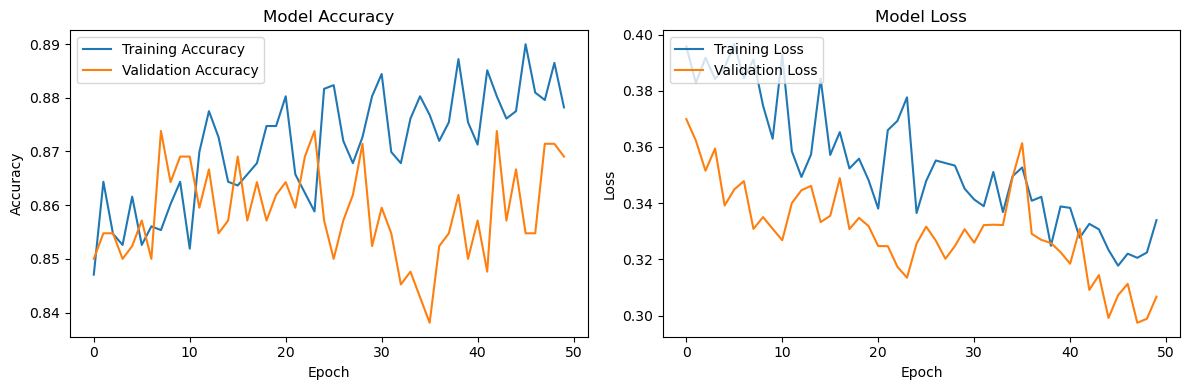

In [9]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history_fine)

# Adjustment of Hyperparameters

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras_tuner import HyperModel

def build_model(hp):
    model = Sequential()

    # Add convolutional layers with tunable filters and kernel sizes
    model.add(Conv2D(
        filters=hp.Int('conv_filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_kernel_size_1', values=[3, 5]),
        activation='relu',
        input_shape=(224, 224, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(
        filters=hp.Int('conv_filters_2', min_value=64, max_value=256, step=32),
        kernel_size=hp.Choice('conv_kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=512, step=64),
        activation='relu'
    ))
    model.add(Dense(len(train_generator.class_indices), activation='softmax'))

    # Compile model with tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of times to train each combination
    directory='hyperparameter_tuning',
    project_name='image_classification_tuning'
)

In [ ]:
tuner.search(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

In [ ]:
best_model = tuner.hypermodel.build(best_hps)

history_hp = best_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)
# Save the best model
best_model.save('best_model.h5')

In [ ]:
plot_training_history(history_hp)

# Regularization and Optimizer Changes

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Conv2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

# Add L2 regularization to layers
for layer in model.layers:
    if isinstance(layer, Dense) or isinstance(layer, Conv2D):
        layer.kernel_regularizer = l2(0.01)  # Adjust regularization strength

# Add dropout
model.add(Dropout(0.5))  # Example dropout layer (add between Dense layers if needed)

# Compile with SGD optimizer and momentum
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a learning rate schedule
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)

# Fine-tune the model
history_reg_opt = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[lr_scheduler]
)

# Evaluate the fine-tuned model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss after tuning: {test_loss:.4f}")
print(f"Test Accuracy after tuning: {test_accuracy * 100:.2f}%")

plot_training_history(history_reg_opt)

# Transfer Learning Featuring EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the pre-trained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce dimensionality
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(14, activation='softmax')(x)  # Final layer for 14 classes

# Create the complete model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history_effnet = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss after tuning: {test_loss:.4f}")
print(f"Test Accuracy after tuning: {test_accuracy * 100:.2f}%")
plot_training_history(history_effnet)

In [ ]:
# Unfreeze the top 20 layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history_effnet_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Adjust based on validation performance
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss after tuning: {test_loss:.4f}")
print(f"Test Accuracy after tuning: {test_accuracy * 100:.2f}%")
plot_training_history(history_effnet_fine)